In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("WDI Analysis") \
    .getOrCreate()

24/07/20 18:57:13 WARN Utils: Your hostname, jfgs resolves to a loopback address: 127.0.1.1; using 192.168.18.129 instead (on interface ens33)
24/07/20 18:57:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/07/20 18:57:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
file_path = "data/Countries_Indicators.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

24/07/20 18:57:31 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [27]:
countries = ["ESP", "USA", "CHE", "SWE", "GBR", "NLD", "FRA", "ITA", "DZA", "MAR", "PRT"]
indicator = "IT.NET.SECR.P6"

df_filter = df.filter((df["Country Code"].isin(countries)) & (df["Indicator Code"] == indicator))

df_select = df_filter.select("Country Name", "Country Code", "Indicator Name", "2010", "2015", "2020")

df_select.show()

+--------------+------------+--------------------+------------------+------------------+------------------+
|  Country Name|Country Code|      Indicator Name|              2010|              2015|              2020|
+--------------+------------+--------------------+------------------+------------------+------------------+
|       Algeria|         DZA|Secure Internet s...|0.3625578781818916| 3.843901778800953|48.467646787122035|
|        France|         FRA|Secure Internet s...|278.03844576185895|1898.4715335658905| 36123.87170155434|
|         Italy|         ITA|Secure Internet s...|127.06356621443204| 628.0196689042104|20677.183009476412|
|       Morocco|         MAR|Secure Internet s...| 1.570929064390072|  9.45777590365156| 442.0698517791765|
|   Netherlands|         NLD|Secure Internet s...|2084.8136372811864|  9728.85177813382| 136862.9991686495|
|      Portugal|         PRT|Secure Internet s...|162.39324323046222| 901.3256902150554| 22178.90681834978|
|         Spain|         ESP

In [28]:
import pandas as pd

pdf = df_select.toPandas()

pdf_melted = pdf.melt(id_vars=["Country Name", "Country Code", "Indicator Name"], 
                      value_vars=["2010", "2015", "2020"],
                      var_name="Year", 
                      value_name="Value")

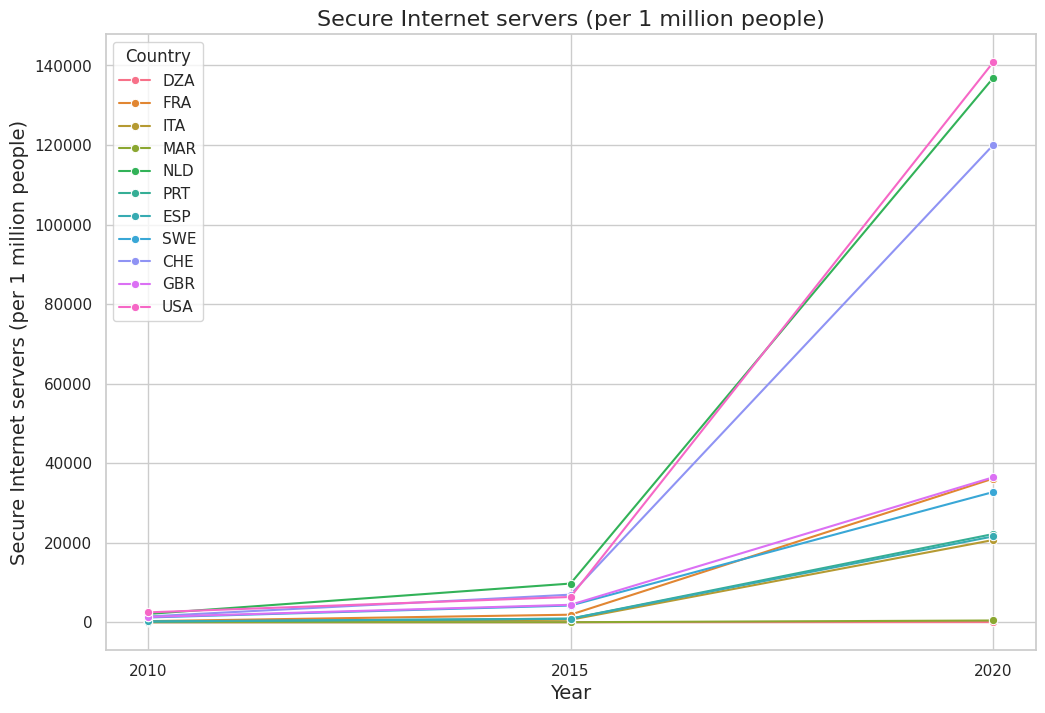

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.lineplot(data=pdf_melted, x="Year", y="Value", hue="Country Code", marker="o")

plt.title("Secure Internet servers (per 1 million people)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Secure Internet servers (per 1 million people)", fontsize=14)
plt.legend(title="Country")

plt.show()
